In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from astropy import table
from astropy.table import Table
from astropy.io import ascii
from astroML.plotting import scatter_contour

SAGA_DIR = os.environ['SAGA_DIR']


In [12]:
from palettable.colorbrewer.qualitative import Dark2_8
if 'plt' in locals() and hasattr(plt, 'rcParams'):
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['font.size'] = 13.0
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=Dark2_8.mpl_colors)
    plt.rcParams['legend.fontsize'] = 'medium'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 7, 6
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 4

In [13]:
SAGA_DIR   = os.environ['SAGA_DIR']

In [14]:
# READ SPECTRA
file = SAGA_DIR +'/data/saga_spectra_clean.fits.gz'
allspec = Table.read(file)

In [15]:
m = (allspec['SATS'] != 3) & (allspec['PHOT_SG'] == 'GALAXY')
allspec=allspec[m]

In [16]:
msk          = allspec['HOST_SAGA_NAME'] != '' 
hostnames    = np.unique(allspec['HOST_SAGA_NAME'][msk])


In [17]:
# FIND NAMED HOSTS
complete_hosts =[147100,166313,165536,61945,149781,33446,150887,132339]
incomplete_hosts = [85746,140594,161174,13927,137625,129237]

In [18]:
# FIND ONLY OBJECTS IN NAMED HOSTS
##imsk = np.in1d(allspec['HOST_NSAID'], incomplete_hosts)
#msk  = np.in1d(allspec['HOST_NSAID'], complete_hosts)


In [19]:
# FIND ONLY SATELLITES
sats = allspec['SATS'] == 1
high_photoz = allspec['PHOTOZ'] > 0.1

#m = spec['SPEC_Z'] > 0.005) & (spec['SPEC_Z'] < 0.1)

mlowz = (allspec['SPEC_Z'] > 0.005) & (allspec['SPEC_Z'] < 0.015)



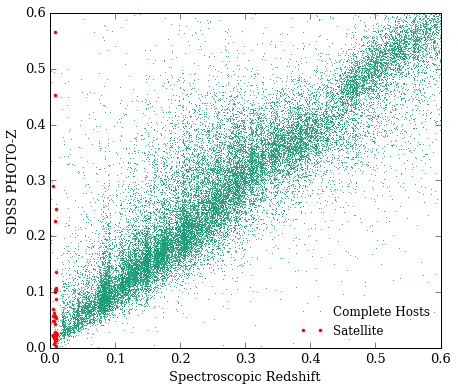

In [20]:
# MAKE THE PLOT
plt.plot(allspec['SPEC_Z'][msk],allspec['PHOTOZ'][msk],'.',ms=1,label='Complete Hosts')
plt.plot(allspec['SPEC_Z'][msk&sats],allspec['PHOTOZ'][msk&sats],'r.',label='Satellite')

plt.xlabel('Spectroscopic Redshift')
plt.ylabel('SDSS PHOTO-Z')
plt.ylim(0,0.6)
plt.xlim(0,0.6)
plt.legend(fontsize=12,loc=4)

#plt.savefig('fig_sa.pdf')
plt.show()


In [21]:
r = allspec['r'] - allspec['EXTINCTION_R']
#diff = (allspec['PHOTOZ']-allspec['SPEC_Z'])/allspec['PHOTOZ_ERR']
diff = (allspec['PHOTOZ']-allspec['SPEC_Z'])/allspec['SPEC_Z']


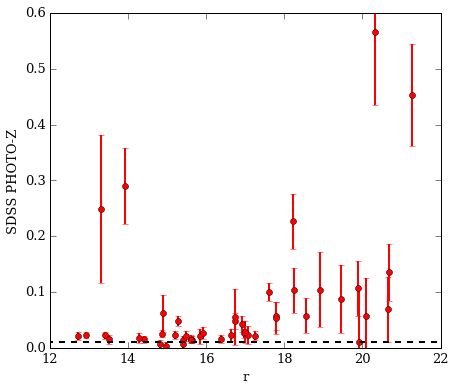

In [22]:
# ADD BRIGHT< FAINT symbols
plt.plot(r[msk&sats],allspec['PHOTOZ'][msk&sats],'ro',label='Satellite')
plt.ylim(0,0.6)
plt.xlim(12,22)
plt.ylabel('SDSS PHOTO-Z')
plt.xlabel('r')
plt.errorbar(r[msk&sats],allspec['PHOTOZ'][msk&sats],yerr = allspec['PHOTOZ_ERR'][msk&sats],fmt='r.')
plt.plot([2,25],[0.01,0.01],'k--')

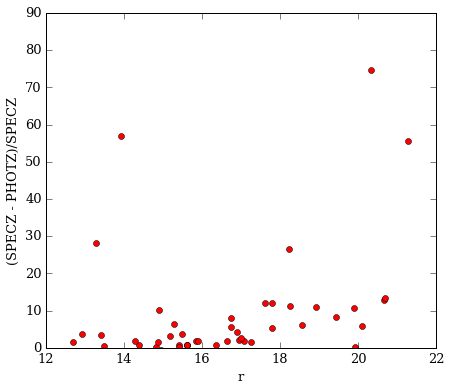

In [23]:
plt.plot(r[msk&sats],diff[msk&sats],'ro',label='Satellite')
plt.ylim(0,90)
plt.xlim(12,22)
plt.ylabel('(SPECZ - PHOTZ)/SPECZ')
plt.xlabel('r')

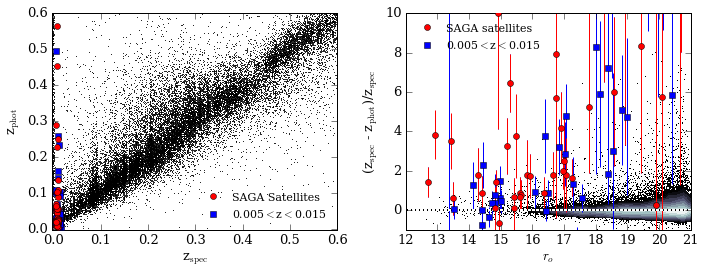

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(allspec['SPEC_Z'][msk],allspec['PHOTOZ'][msk],'k.',ms=1,label='_nolabel')

ax1.plot(allspec['SPEC_Z'][msk&sats],allspec['PHOTOZ'][msk&sats],'ro',label='SAGA Satellites',zorder=4)
ax1.plot(allspec['SPEC_Z'][msk&mlowz&~sats],allspec['PHOTOZ'][msk&mlowz&~sats],'bs',label='0.005$<$z$<$0.015',zorder=3)


ax1.set_xlabel('z$_{\mathrm{spec}}}$')
ax1.set_ylabel('z$_{\mathrm{phot}}$')
ax1.set_ylim(-0.003,0.6)
ax1.set_xlim(-0.003,0.6)
ax1.legend(fontsize=11,loc=4,numpoints = 1)

###############
lims = (r > 12) & (r < 21) & (diff>-1) & (diff < 8)
scatter_contour(r[msk&lims],diff[msk&lims], ax=ax2,
                threshold=60, log_counts=True, 
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax2.plot([-10,100],[0,0],'w')
ax2.plot([-10,100],[0,0],'k:')

#ax2.plot(r[msk],diff[msk],'k.',label='All Galaxies',ms=1)
ax2.plot(r[msk&sats],diff[msk&sats],'ro',label='SAGA satellites',zorder=4)
ax2.plot(r[msk&mlowz&~sats],diff[msk&mlowz&~sats],'bs',label='0.005$<$z$<$0.015',zorder=3)
ax2.errorbar(r[msk&mlowz],diff[msk&mlowz],yerr = (allspec['PHOTOZ_ERR'][msk&mlowz])/allspec['SPEC_Z'][msk&mlowz],fmt='b.',linewidth=1,capsize=0,label='_nolabel')

ax2.errorbar(r[msk&sats],diff[msk&sats],yerr = (allspec['PHOTOZ_ERR'][msk&sats])/allspec['SPEC_Z'][msk&sats],fmt='r.',linewidth=1,capsize=0,label='_nolabel')



#ax2.set_ylim(-10,90)
ax2.set_ylim(-1,10)
ax2.set_xlim(12,21)
ax2.set_ylabel('(z$_{\mathrm{spec}}$ - z$_{\mathrm{phot}}$)/z$_{\mathrm{spec}}}$')
ax2.set_xlabel('$r_o$')
ax2.legend(fontsize=11,loc=2,numpoints = 1)

plt.rcParams['figure.figsize'] = 10, 4
plt.tight_layout()
plt.savefig('fig_photz.pdf')

